In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from collections import defaultdict
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [131]:
df_job = pd.read_csv('jobs_in_data.csv')

df_job.sample(5)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
3812,2023,Data Analyst,Data Analysis,EUR,49200,53120,Estonia,Senior,Full-time,In-person,Estonia,M
6193,2023,MLOps Engineer,Machine Learning and AI,USD,134000,134000,United States,Mid-level,Full-time,Remote,United States,M
1883,2023,Data Modeler,Data Architecture and Modeling,USD,130000,130000,United States,Senior,Full-time,Remote,United States,L
6818,2023,Machine Learning Engineer,Machine Learning and AI,USD,240000,240000,United States,Senior,Full-time,Remote,United States,M
9210,2021,Lead Data Engineer,Data Engineering,USD,276000,276000,United States,Senior,Full-time,In-person,United States,L


In [132]:
df_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


## Exploratory Data Analytics

In [133]:
df_salary = df_job.groupby('job_category')['salary_in_usd'].mean().reset_index().sort_values('salary_in_usd',ascending=False)

df_salary.head()

,job_category,salary_in_usd
9,Machine Learning and AI,178925.847339
7,Data Science and Research,163758.575979
3,Data Architecture and Modeling,156002.359073
1,Cloud and Database,155000.000000
4,Data Engineering,146197.656195


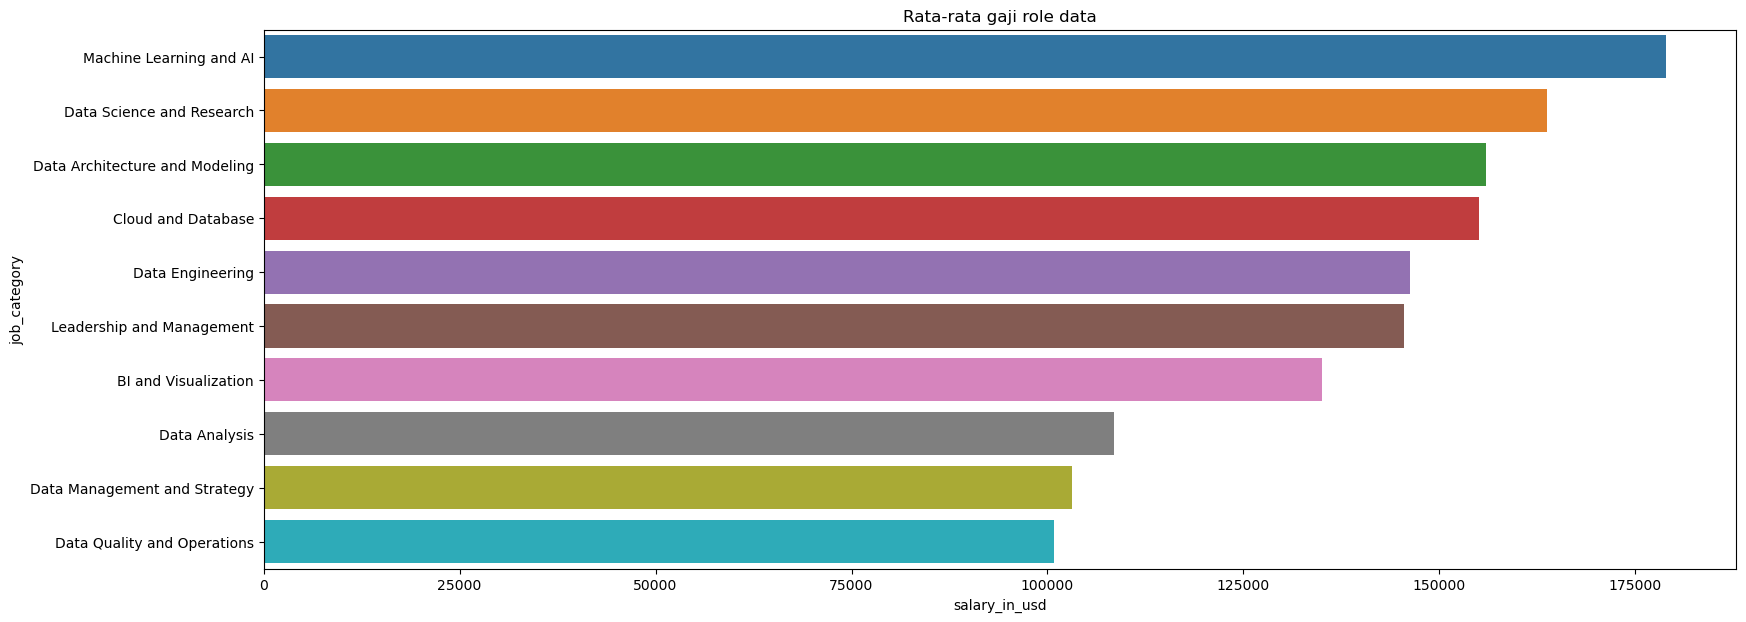

In [134]:
plt.figure(figsize=(19,7))
plt.title('Rata-rata gaji role data')
sns.barplot(data= df_salary, y='job_category', x='salary_in_usd')
plt.show()

kategori yang memiliki rata-rata 3 role data gaji tertinggi adalah Machine Learning and AI, Data Science and Research, dan Data Architecture and Modeling

In [135]:
df_year = df_job.groupby(['work_year','job_category'])['salary_in_usd'].mean().reset_index().sort_values('salary_in_usd',ascending=False)

df_year.head()

,work_year,job_category,salary_in_usd
30,2023,Machine Learning and AI,187266.857741
12,2022,Cloud and Database,175000.000000
28,2023,Data Science and Research,170078.135930
5,2021,Data Architecture and Modeling,169940.600000
14,2022,Data Architecture and Modeling,166091.543478


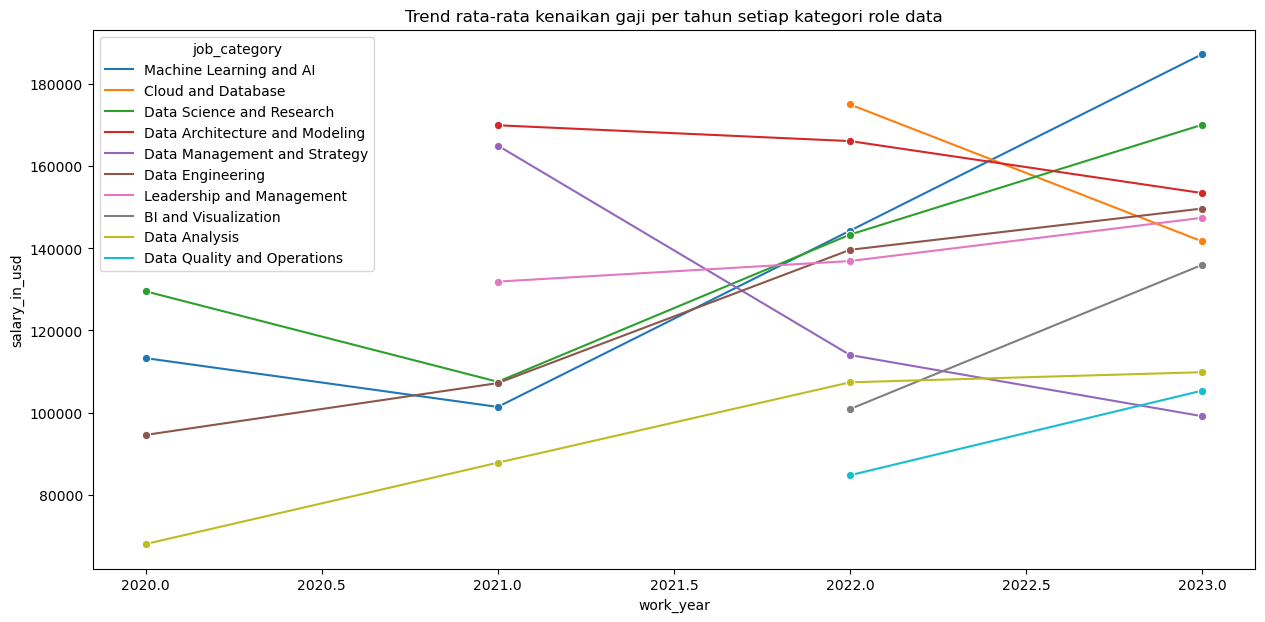

In [136]:
plt.figure(figsize=(15,7))
plt.title('Trend rata-rata kenaikan gaji per tahun setiap kategori role data')
sns.lineplot(data= df_year, hue='job_category', y='salary_in_usd', x='work_year', marker='o')
plt.show()

per tahun 2021 sampai 2023 3 kategori role data yang mengalami tren kenaikan rata" gaji terbanyak adalah Machine Learning and AI, Data Science and Research, dan Data Engineer

In [137]:
df_experience = df_job.groupby('experience_level')['salary_in_usd'].mean().reset_index().sort_values('salary_in_usd', ascending=False)

df_experience

,experience_level,salary_in_usd
1,Executive,189462.914591
3,Senior,162356.126099
2,Mid-level,117523.918138
0,Entry-level,88534.776210


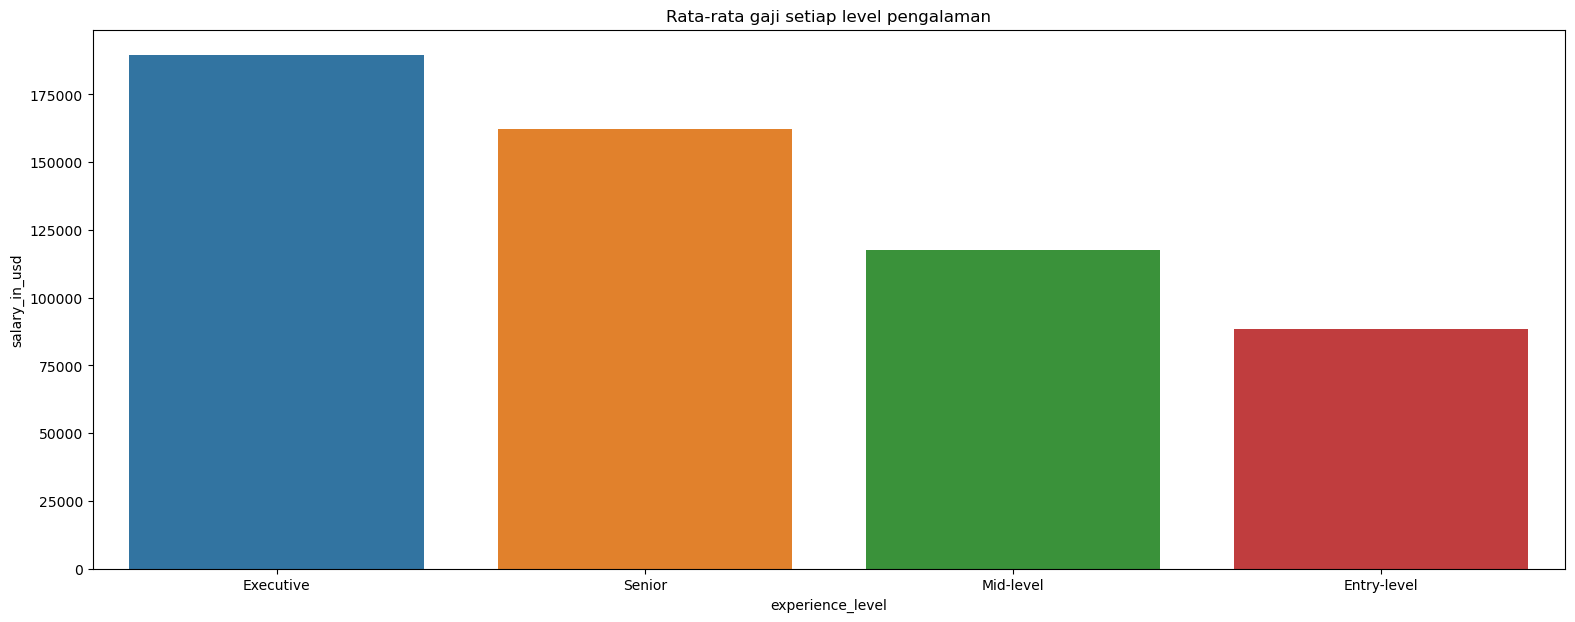

In [138]:
plt.figure(figsize=(19,7))
plt.title('Rata-rata gaji setiap level pengalaman')
sns.barplot(data= df_experience, x='experience_level', y='salary_in_usd')
plt.show()

urutan level experience dengan rata-rata gaji tertinggi adalah excecutive, senior, mid level dan entry level

In [139]:
df_work = df_job.groupby(['work_setting','work_year'])['salary_in_usd'].mean().reset_index().sort_values('salary_in_usd', ascending=False)

df_work.head()

,work_setting,work_year,salary_in_usd
7,In-person,2023,158803.746185
11,Remote,2023,148966.397934
10,Remote,2022,138544.384174
6,In-person,2022,135186.935028
8,Remote,2020,117314.800000


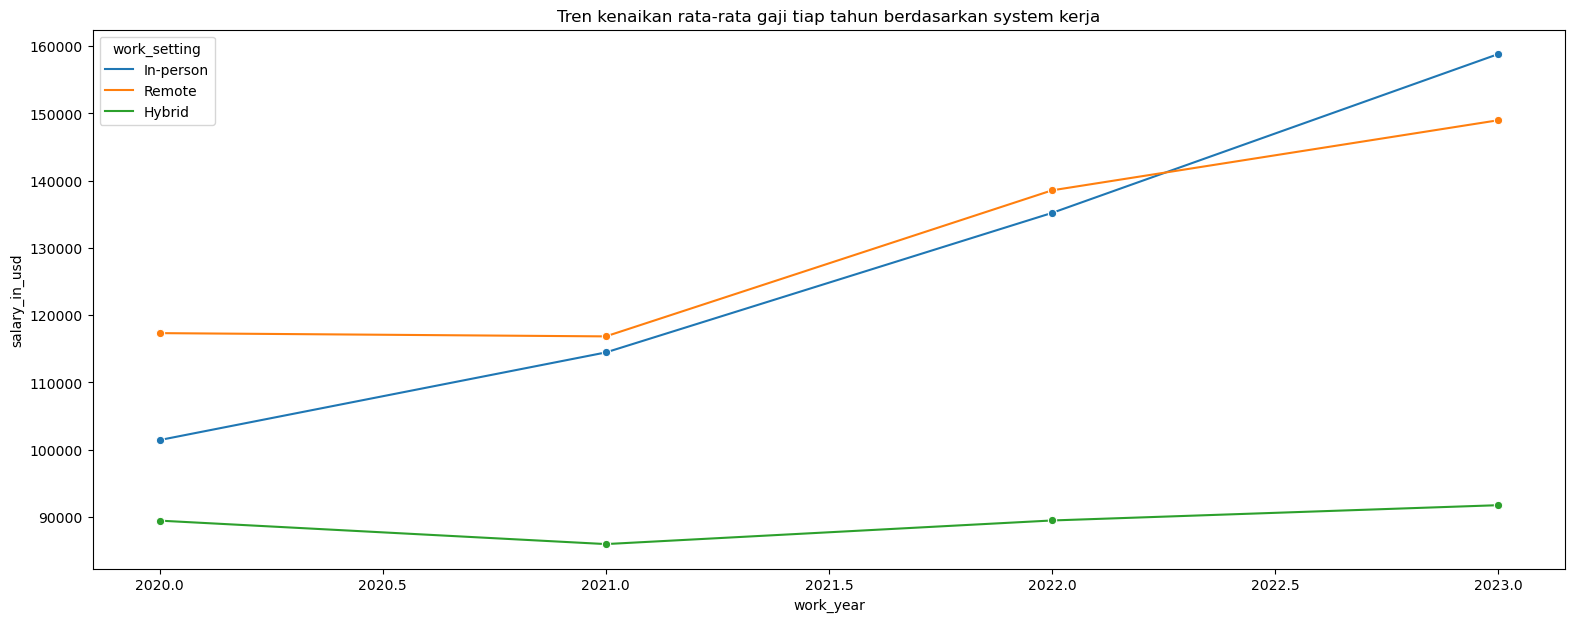

In [140]:
plt.figure(figsize=(19,7))
plt.title('Tren kenaikan rata-rata gaji tiap tahun berdasarkan system kerja')
sns.lineplot(data=df_work, hue='work_setting', y='salary_in_usd', x='work_year', marker='o')
plt.show()

tren kenaikan rata-rata gaji data role per 2021 sampai 2023 adalah yang kerjanya remote(WFH) dan di kantor(WFO) sedangkan system kerja hybrid cenderung stagnan

In [141]:
df_work_setting = df_job.groupby('work_setting')['salary_in_usd'].mean().reset_index().sort_values('salary_in_usd', ascending=False)

df_work_setting

,work_setting,salary_in_usd
1,In-person,155524.120942
2,Remote,144996.016599
0,Hybrid,88912.287958


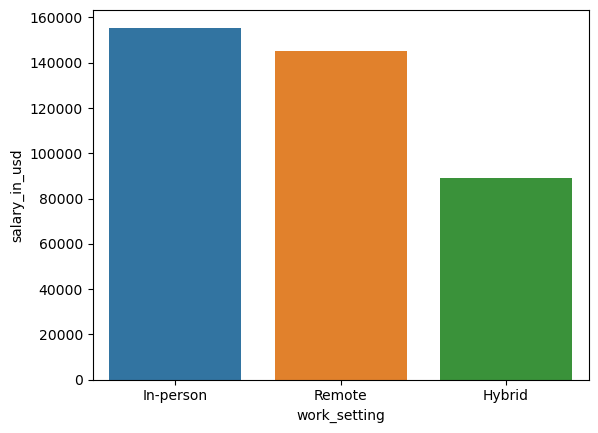

In [142]:
sns.barplot(data=df_work_setting, x='work_setting', y='salary_in_usd')
plt.show()

Rata-rata gaji paling tinggi adalah yang system kerja perusahaannya onsite(WFO)

In [143]:
df_job.sample()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
6894,2023,Data Manager,Leadership and Management,USD,140000,140000,United States,Senior,Full-time,In-person,United States,M


In [144]:
df_size = df_job.groupby('company_size')['salary_in_usd'].mean().reset_index().sort_values('salary_in_usd', ascending=False)

df_size

,company_size,salary_in_usd
1,M,152237.089252
0,L,141097.163102
2,S,90642.597484


In [145]:
df_size_year = df_job.groupby(['company_size','work_year'])['salary_in_usd'].mean().reset_index().sort_values('salary_in_usd', ascending=False)

df_size_year.head()

,company_size,work_year,salary_in_usd
7,M,2023,155659.268558
3,L,2023,153961.643868
6,M,2022,137949.564815
2,L,2022,128632.170330
0,L,2020,119074.718750


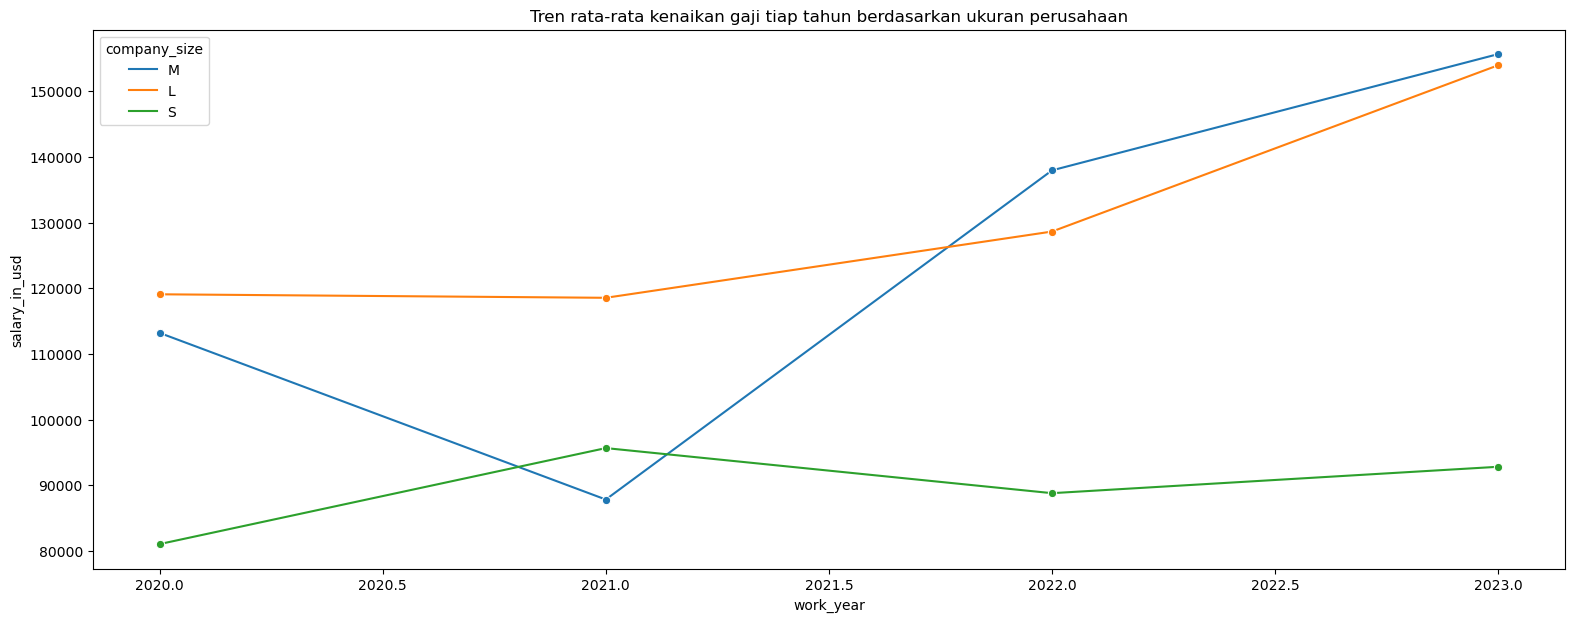

In [146]:
plt.figure(figsize=(19,7))
plt.title('Tren rata-rata kenaikan gaji tiap tahun berdasarkan ukuran perusahaan')
sns.lineplot(data=df_size_year, hue='company_size', y='salary_in_usd', x='work_year', marker='o')
plt.show()

Pada tahun 2020 trend rata-rata gaji paling tinggi adalah perusahaan yang besar dan mulai 2021 perusahaan yang menengah mulai mengalami kenaikan hingga melebihi perusahaan yang besar pada tahun 2022 sampai 2023

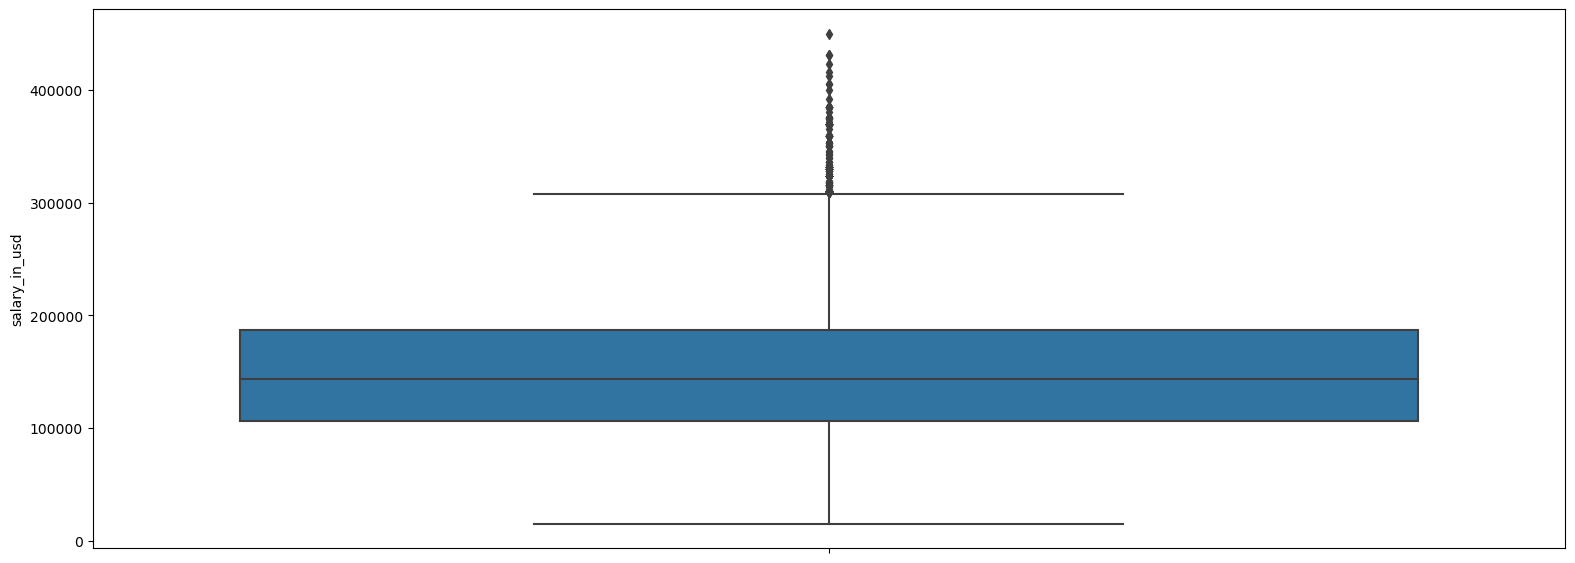

In [147]:
plt.figure(figsize=(19,7))
sns.boxplot(data=df_job, y='salary_in_usd')
plt.show()

## Feature Engineering

* Split dataset
* Handling data duplikat
* Drop data
* Label encoding
* Standard Scalerr

### Split dataset

In [148]:
train, test = train_test_split(df_job, test_size=0.25, random_state=42)

### Handling data duplikat

In [149]:
train.duplicated().sum()

2705

In [150]:
test.duplicated().sum()

531

In [151]:
train.drop_duplicates(keep='first', inplace=True)
test.drop_duplicates(keep='first', inplace=True)

In [152]:
train.duplicated().sum()

0

In [153]:
test.duplicated().sum()

0

### Drop features

In [154]:
drop = ['job_title','employee_residence','company_location','salary']

train = train.drop(drop, axis=1)
test = test.drop(drop, axis=1)

melakukan drop features yang memiliki nilai unik yang banyak, dan kemiripan fitur

### Label encoding

In [155]:
columns_to_encoding = ['work_year','job_category','salary_currency', 'experience_level','employment_type','work_setting','company_size']

In [156]:
encoder = LabelEncoder()

for encode in columns_to_encoding:
    train[encode] = encoder.fit_transform(train[encode])
    test[encode] = encoder.transform(test[encode])

melakukan label encoding pada data categorical agar machine learning bisa membaca featurre tersebut

### Standarisasi features

In [157]:
columns_to_scale = ['work_year','job_category','salary_currency', 'experience_level','employment_type','work_setting','company_size','salary_in_usd']

In [158]:
scaler = StandardScaler()

for scaling in columns_to_scale:
    train[scaling] = scaler.fit_transform(train[[scaling]])
    test[scaling] = scaler.transform(test[[scaling]])

melakukan standarisasi dengan standard scaler agar skala nilainya menjadi sama

## Modeling

* KNN
* DecisionTree
* Ridge
* Lasso

In [159]:
X_train = train.drop('salary_in_usd', axis=1)
y_train = train['salary_in_usd']
X_test = test.drop('salary_in_usd', axis=1)
y_test = test['salary_in_usd']

In [160]:
def experiment(X_train,X_test,y_train,y_test):
    result = defaultdict(list)
    
    knn = KNeighborsRegressor()
    dtc = DecisionTreeRegressor()
    ridge = Ridge()
    lasso = Lasso()
    
    list_model = [('K-Nearest Neighbor',knn),
                  ('Decision Tree',dtc),
                  ('Ridge', ridge),
                  ('Lasso', lasso)
                 ]
    
    for model_name,model in list_model:
        start = dt.now()
        model.fit(X_train,y_train)
        duration = (dt.now()-start).total_seconds()
        
        y_pred_test = model.predict(X_test)
        
        RMSE_test = mean_squared_error(y_test,y_pred_test) ** 0.5
        R2_test = r2_score(y_test,y_pred_test)
        
        y_pred_train = model.predict(X_train)
        
        RMSE_train = mean_squared_error(y_train,y_pred_train) ** 0.5
        R2_train= r2_score(y_train,y_pred_train)
        
        result['model_name'].append(model_name)
        result['model'].append(model)
        result['RMSE_test'].append(RMSE_test)
        result['RMSE_train'].append(RMSE_train)
        result['R2_test'].append(R2_test)
        result['R2_train'].append(R2_train)
        result['duration'].append(duration)
        
    return result

In [161]:
result = experiment(X_train,X_test,y_train,y_test)
result = pd.DataFrame(result)

result

,model_name,model,RMSE_test,RMSE_train,R2_test,R2_train,duration
0,K-Nearest Neighbor,KNeighborsRegressor(),0.933202,0.858880,0.144915,0.262325,0.017541
1,Decision Tree,DecisionTreeRegressor(),0.852951,0.751275,0.285657,0.435585,0.014538
2,Ridge,Ridge(),0.874561,0.863018,0.249003,0.255200,0.024078
3,Lasso,Lasso(),1.010793,1.000000,-0.003189,0.000000,0.008529


Setelah melakukan modeling dengan baseline algoritma ridge terlihat sudah best fit walaupun perforrmanya belum maksimal

### Hyperparameter Tunning

* GridSearchCV
* RandomizedSearchCV

### GridSearchCV

In [162]:
param_grid = {
    'alpha': range(1,21),  # Cobalah beberapa nilai alpha yang berbeda
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}
ridge_model = Ridge()

grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='r2')

# Lakukan pencarian parameter terbaik
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': range(1, 21),
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring='r2')

In [163]:
best_params = grid_search.best_params_
ridge_grid_best = Ridge(**best_params)
ridge_grid_best.fit(X_train, y_train)

y_train_ridge_pred = ridge_grid_best.predict(X_train)
y_test_ridge_pred = ridge_grid_best.predict(X_test)

# Calculate RMSE for training and testing data
r2_train = r2_score(y_train, y_train_ridge_pred)
r2_test = r2_score(y_test, y_test_ridge_pred)

print("R2 on training set:", r2_train)
print("R2 on testing set:", r2_test)

R2 on training set: 0.2551956429276939
R2 on testing set: 0.24883780593655813


setelah melakukan hyperparameter menggunakan gridsearchcv hasil R2 pada data testing malah menurun

### RandomizedSearchCV

In [164]:
param_dist = {
    'alpha': range(1,21),
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Cobalah beberapa metode solver yang berbeda
}

ridge_model = Ridge()

# Inisialisasi objek RandomizedSearchCV
ridge_random_search = RandomizedSearchCV(ridge_model, param_distributions=param_dist, cv=5, scoring='r2')

# Lakukan pencarian parameter terbaik
ridge_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(),
                   param_distributions={'alpha': range(1, 21),
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga']},
                   scoring='r2')

In [165]:
best_params = ridge_random_search.best_params_
ridge_random_best = Ridge(**best_params)
ridge_random_best.fit(X_train, y_train)

y_train_ridge_random = ridge_random_best.predict(X_train)
y_test_ridge_random = ridge_random_best.predict(X_test)

# Calculate RMSE for training and testing data
r2_train = r2_score(y_train, y_train_ridge_random)
r2_test = r2_score(y_test, y_test_ridge_random)

print("R2 on training set:", r2_train)
print("R2 on testing set:", r2_test)

R2 on training set: 0.25519752087436853
R2 on testing set: 0.24888061845881948


Setelah melakukan hyperparameter tunning menggunakan randomizedsearchcv hasilnya sama dengan saat menggunakan gridserachcv

**Kesimpulan**

setelah melakukan modeling dan hyperparameter tuning model baseline ridge menjadi model yang best fit walaupun hasilnya belum optimal